# Insurance_Fraud_Detection

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
df=pd.read_csv('fraud.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17 00:00:00,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27 00:00:00,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06 00:00:00,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25 00:00:00,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06 00:00:00,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
#checking for null values 
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

changing the datatype of columns incident_date and policy_bind_date

In [8]:
# Converting 'policy_bind_date' column to datetime
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

# Converting 'incident_date' column to datetime
df['incident_date'] = pd.to_datetime(df['incident_date'])


EXploring through columns 

In [9]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Value counts for column '{column}':\n{value_counts}\n")
    print('........................................................')

Value counts for column 'months_as_customer':
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64

........................................................
Value counts for column 'age':
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64

........................................................
Value counts for column 'policy_number':
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int

In [10]:
#replacing ? with mode in columns police_report_available and property_damage and replacing ? wth unknwon in collision_type columns 

# Calculate the mode of the columns
mode_police_report_available = df['police_report_available'].mode().values[0]
mode_property_damage = df['property_damage'].mode().values[0]


df['police_report_available'] = df['police_report_available'].replace('?', mode_police_report_available)
df['property_damage'] = df['property_damage'].replace('?', mode_property_damage)
df['collision_type'] = df['collision_type'].replace('?', 'unknown')


creating a new column time diffrence between incident date and policy_bind_date

In [11]:
df['time_difference'] = (df['incident_date'] - df['policy_bind_date']).dt.days


In [12]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,time_difference
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,100
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,3130
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,5282
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,8996
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,8622
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,384
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,4358
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,1196


Finding relationships between features 

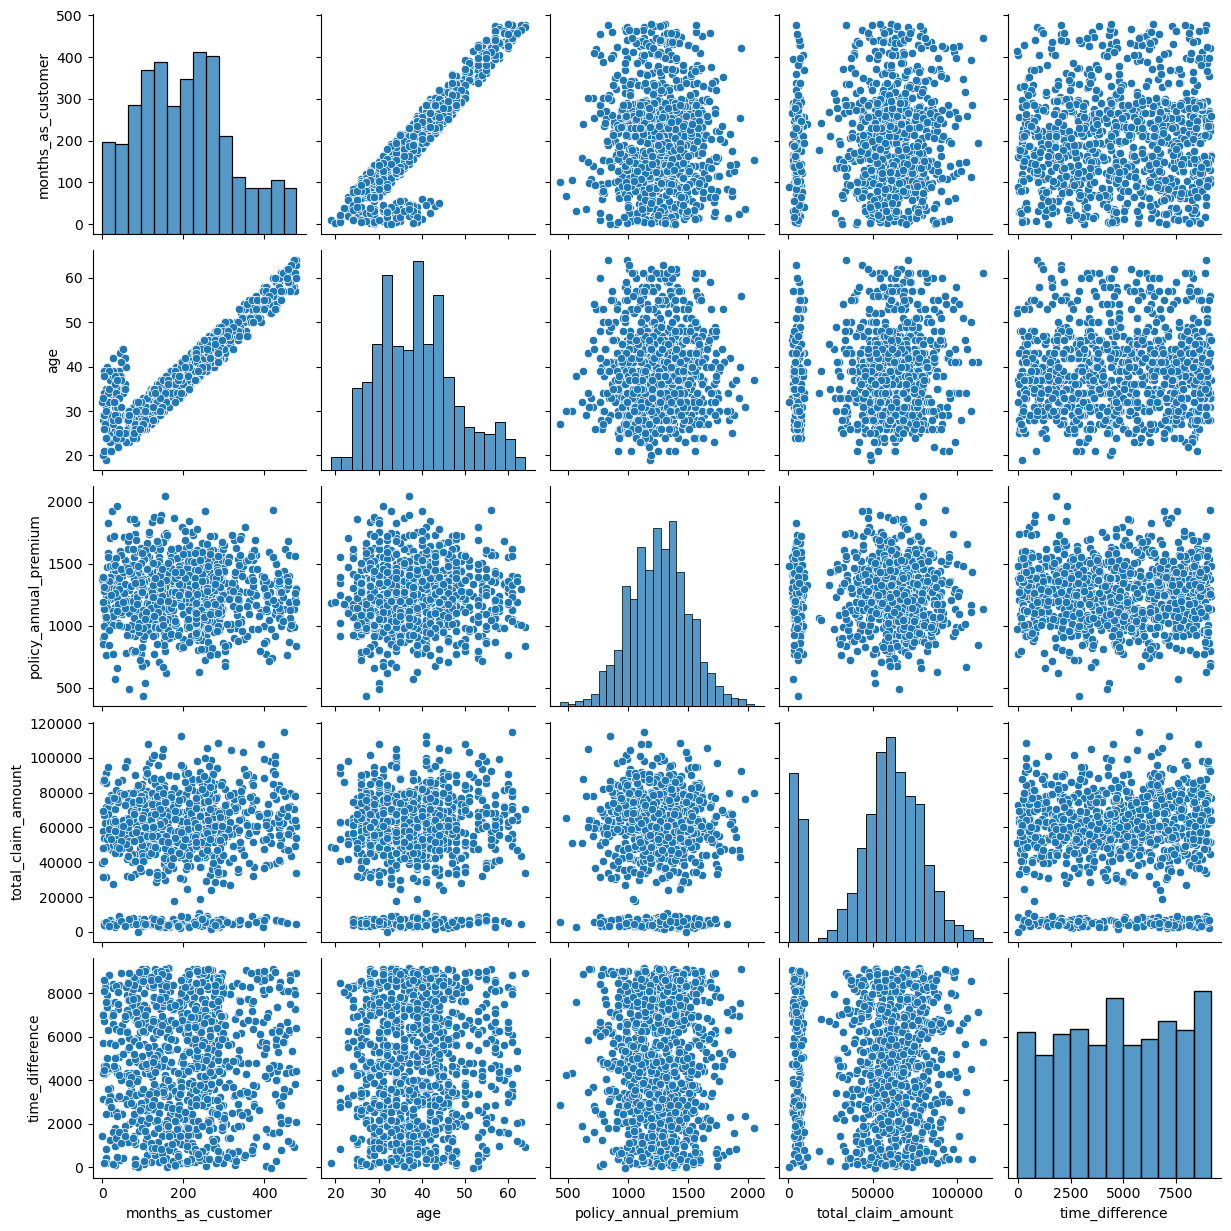

In [13]:
# Exploring the relationship between numerical variables using a pair plot
sns.pairplot(df[['months_as_customer', 'age', 'policy_annual_premium', 'total_claim_amount', 'time_difference']])
plt.show()

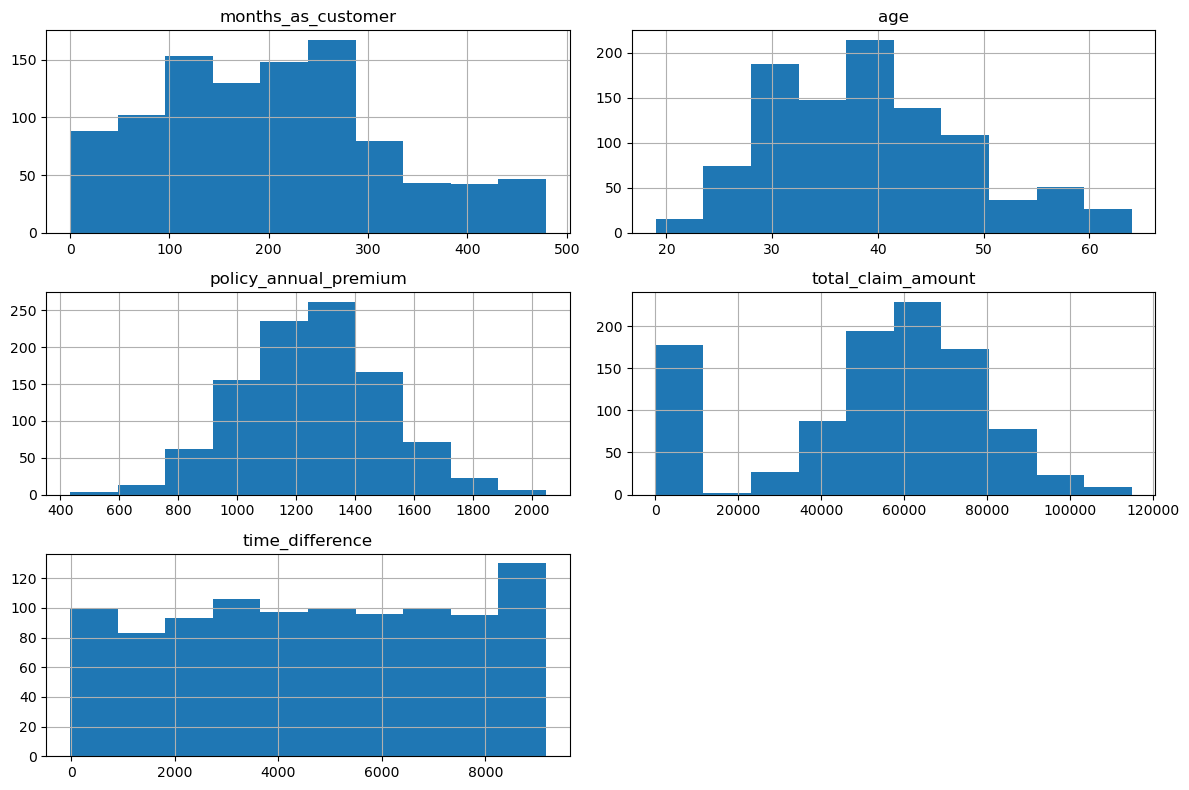

In [14]:
# Analysing the distribution of numerical variables 
df[['months_as_customer', 'age', 'policy_annual_premium', 'total_claim_amount', 'time_difference']].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

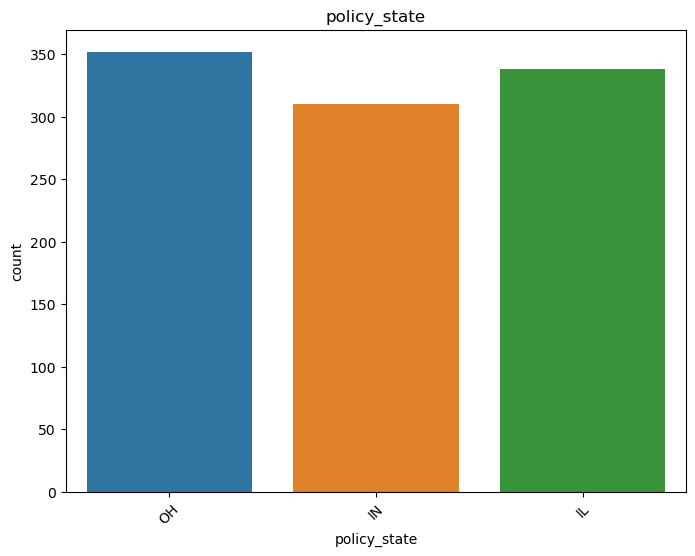

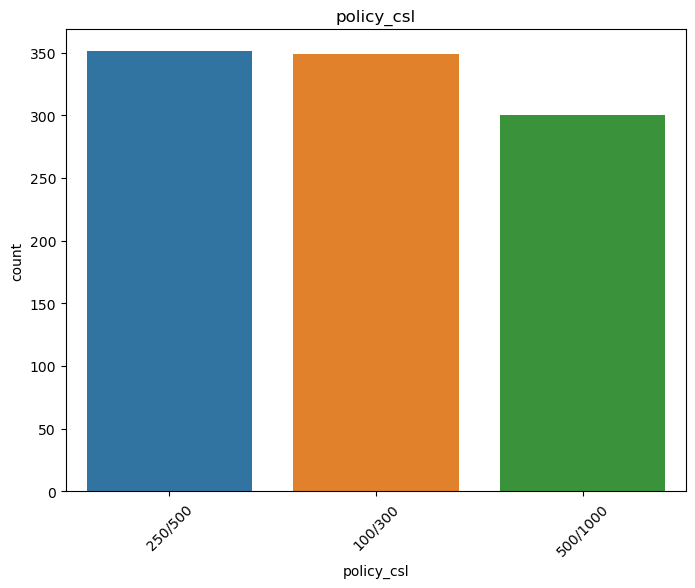

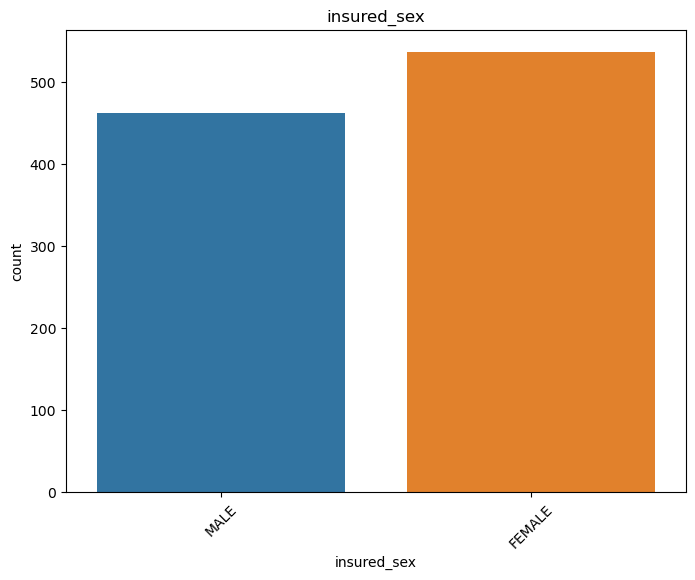

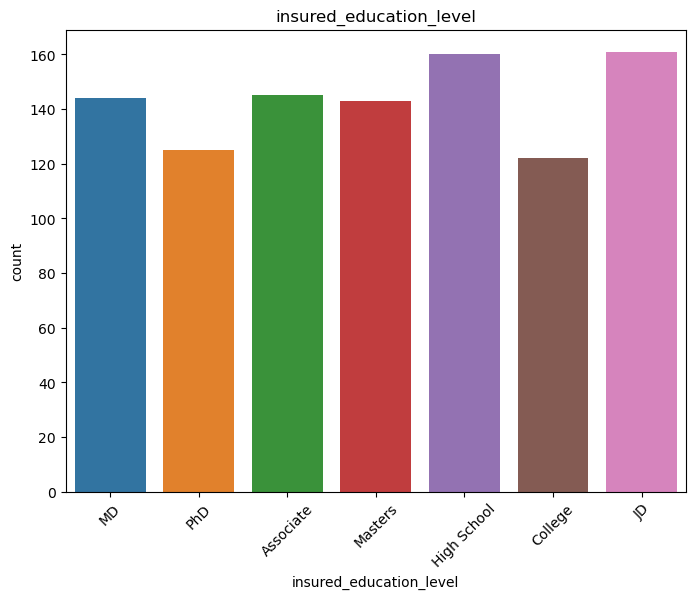

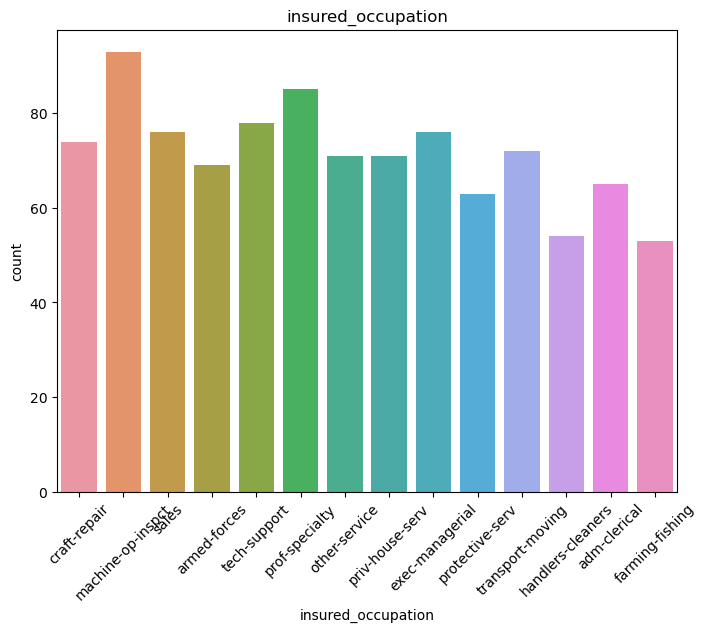

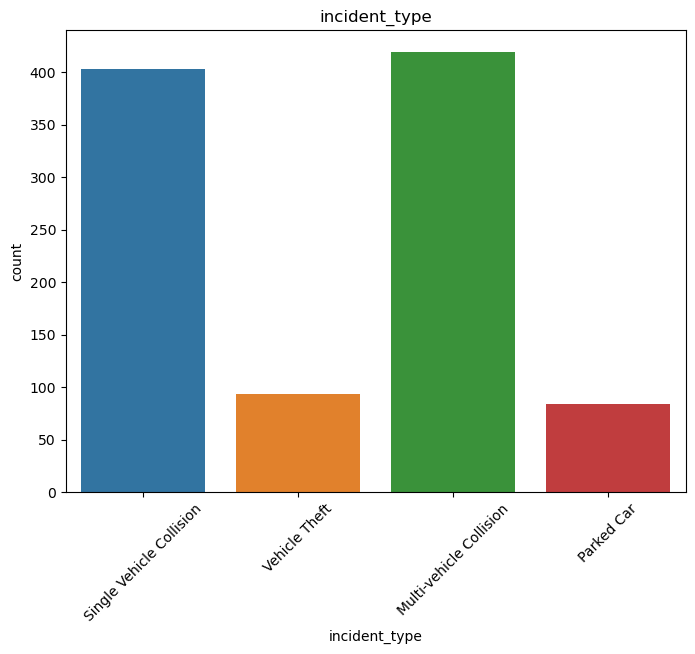

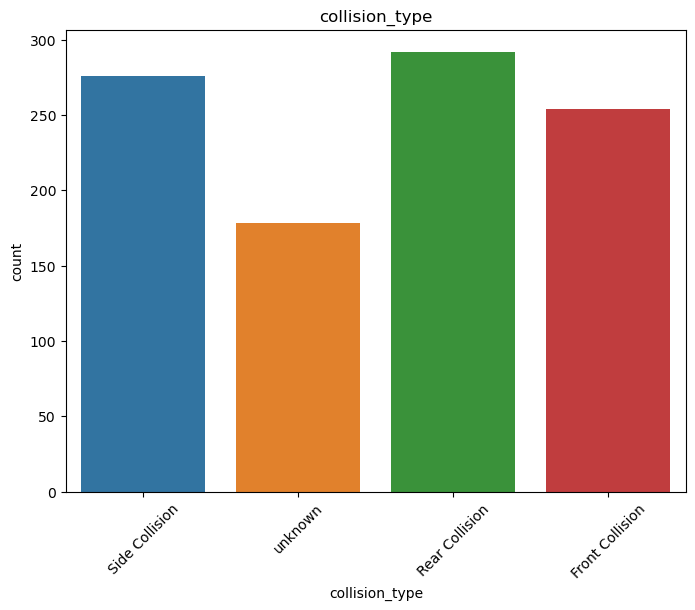

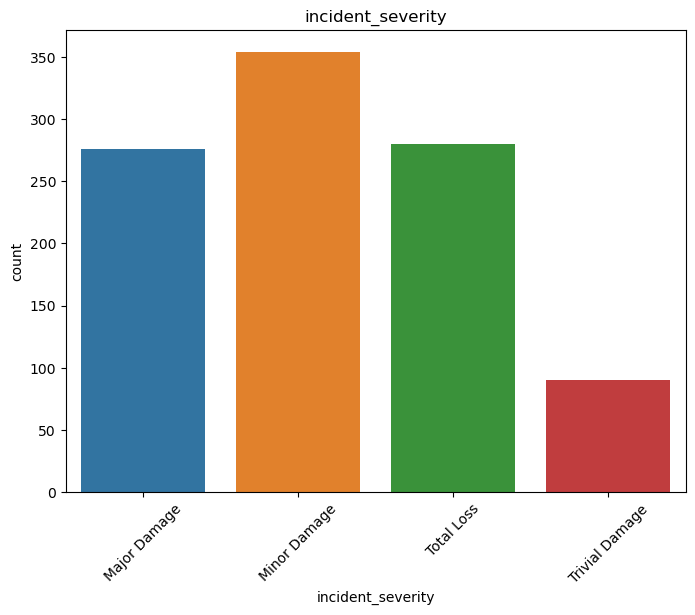

In [15]:
# Analyze the distribution of categorical variables using count plots
categorical_cols = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'incident_type', 'collision_type', 'incident_severity']
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

plotting the correation

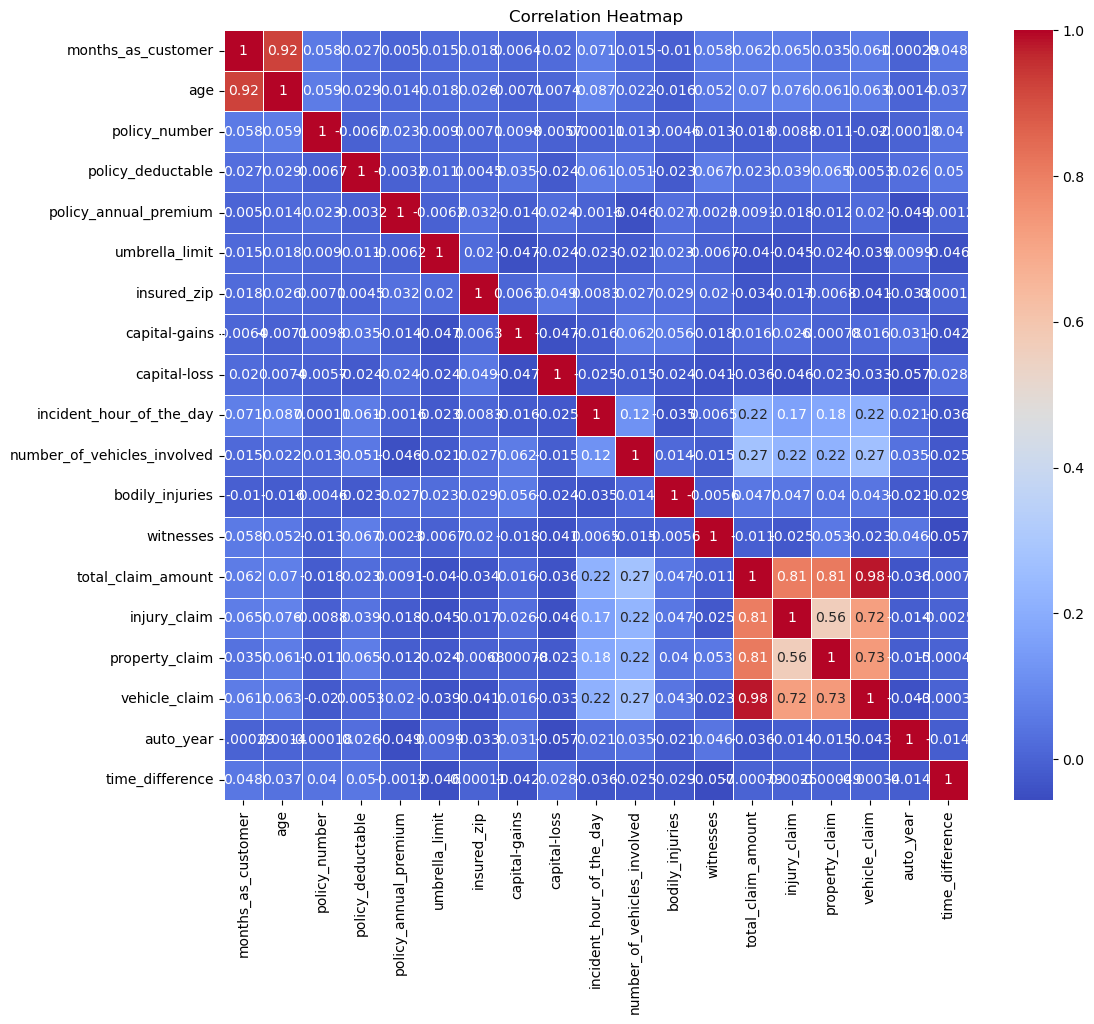

In [16]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Creating a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()

plotting the unique values 

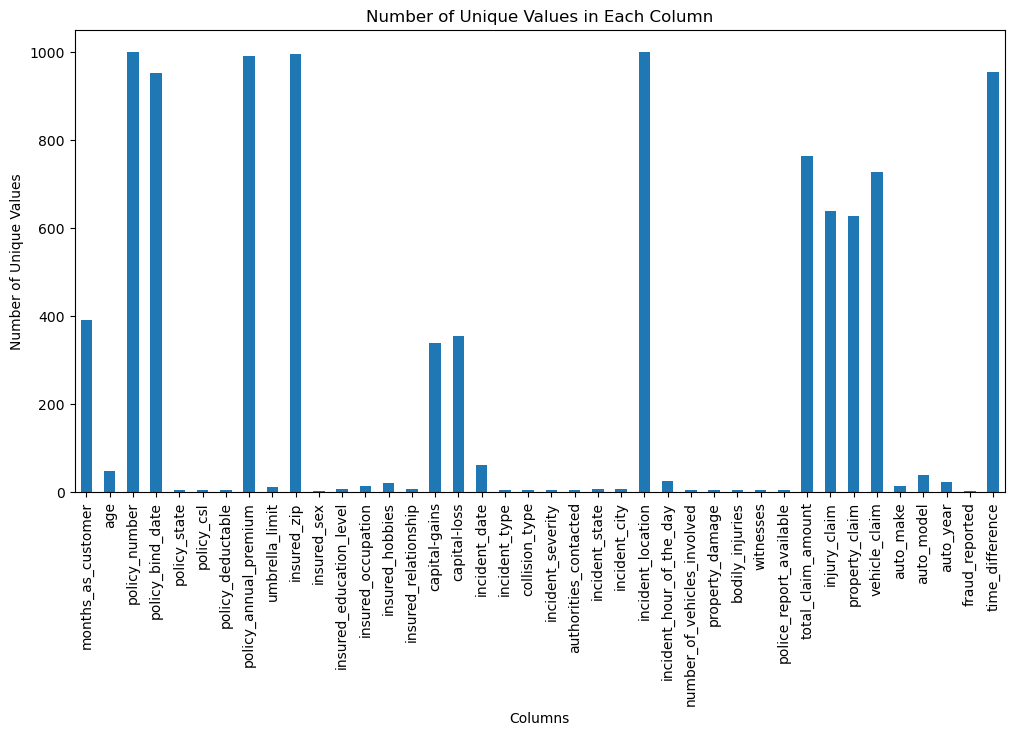

In [17]:


# Calculate the number of unique values for each column
unique_counts = df.nunique()

# Plot the number of unique values
plt.figure(figsize=(12, 6))
unique_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Each Column')
plt.xticks(rotation=90)
plt.show()


Encoding categorical variables 


In [18]:
le = LabelEncoder()
categorical_cols = ['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies',
                    'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted',
                    'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available',
                    'auto_make', 'auto_model', 'fraud_reported']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


checking for outliers 

In [19]:
numerical_cols = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip',
                  'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries',
                  'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'time_difference']
# Calculating the IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Defining a threshold to identify outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Finding the outliers by comparing values to the threshold
outliers = (df[numerical_cols] < (Q1 - threshold * IQR)) | (df[numerical_cols] > (Q3 + threshold * IQR))

# Counting the number of outliers in each column
outliers_count = outliers.sum()

# Printing the columns with their corresponding number of outliers
print(outliers_count)

months_as_customer               0
age                              4
policy_deductable                0
policy_annual_premium            9
umbrella_limit                 202
insured_zip                      0
capital-gains                    0
capital-loss                     0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
bodily_injuries                  0
witnesses                        0
total_claim_amount               1
injury_claim                     0
property_claim                   6
vehicle_claim                    0
auto_year                        0
time_difference                  0
dtype: int64


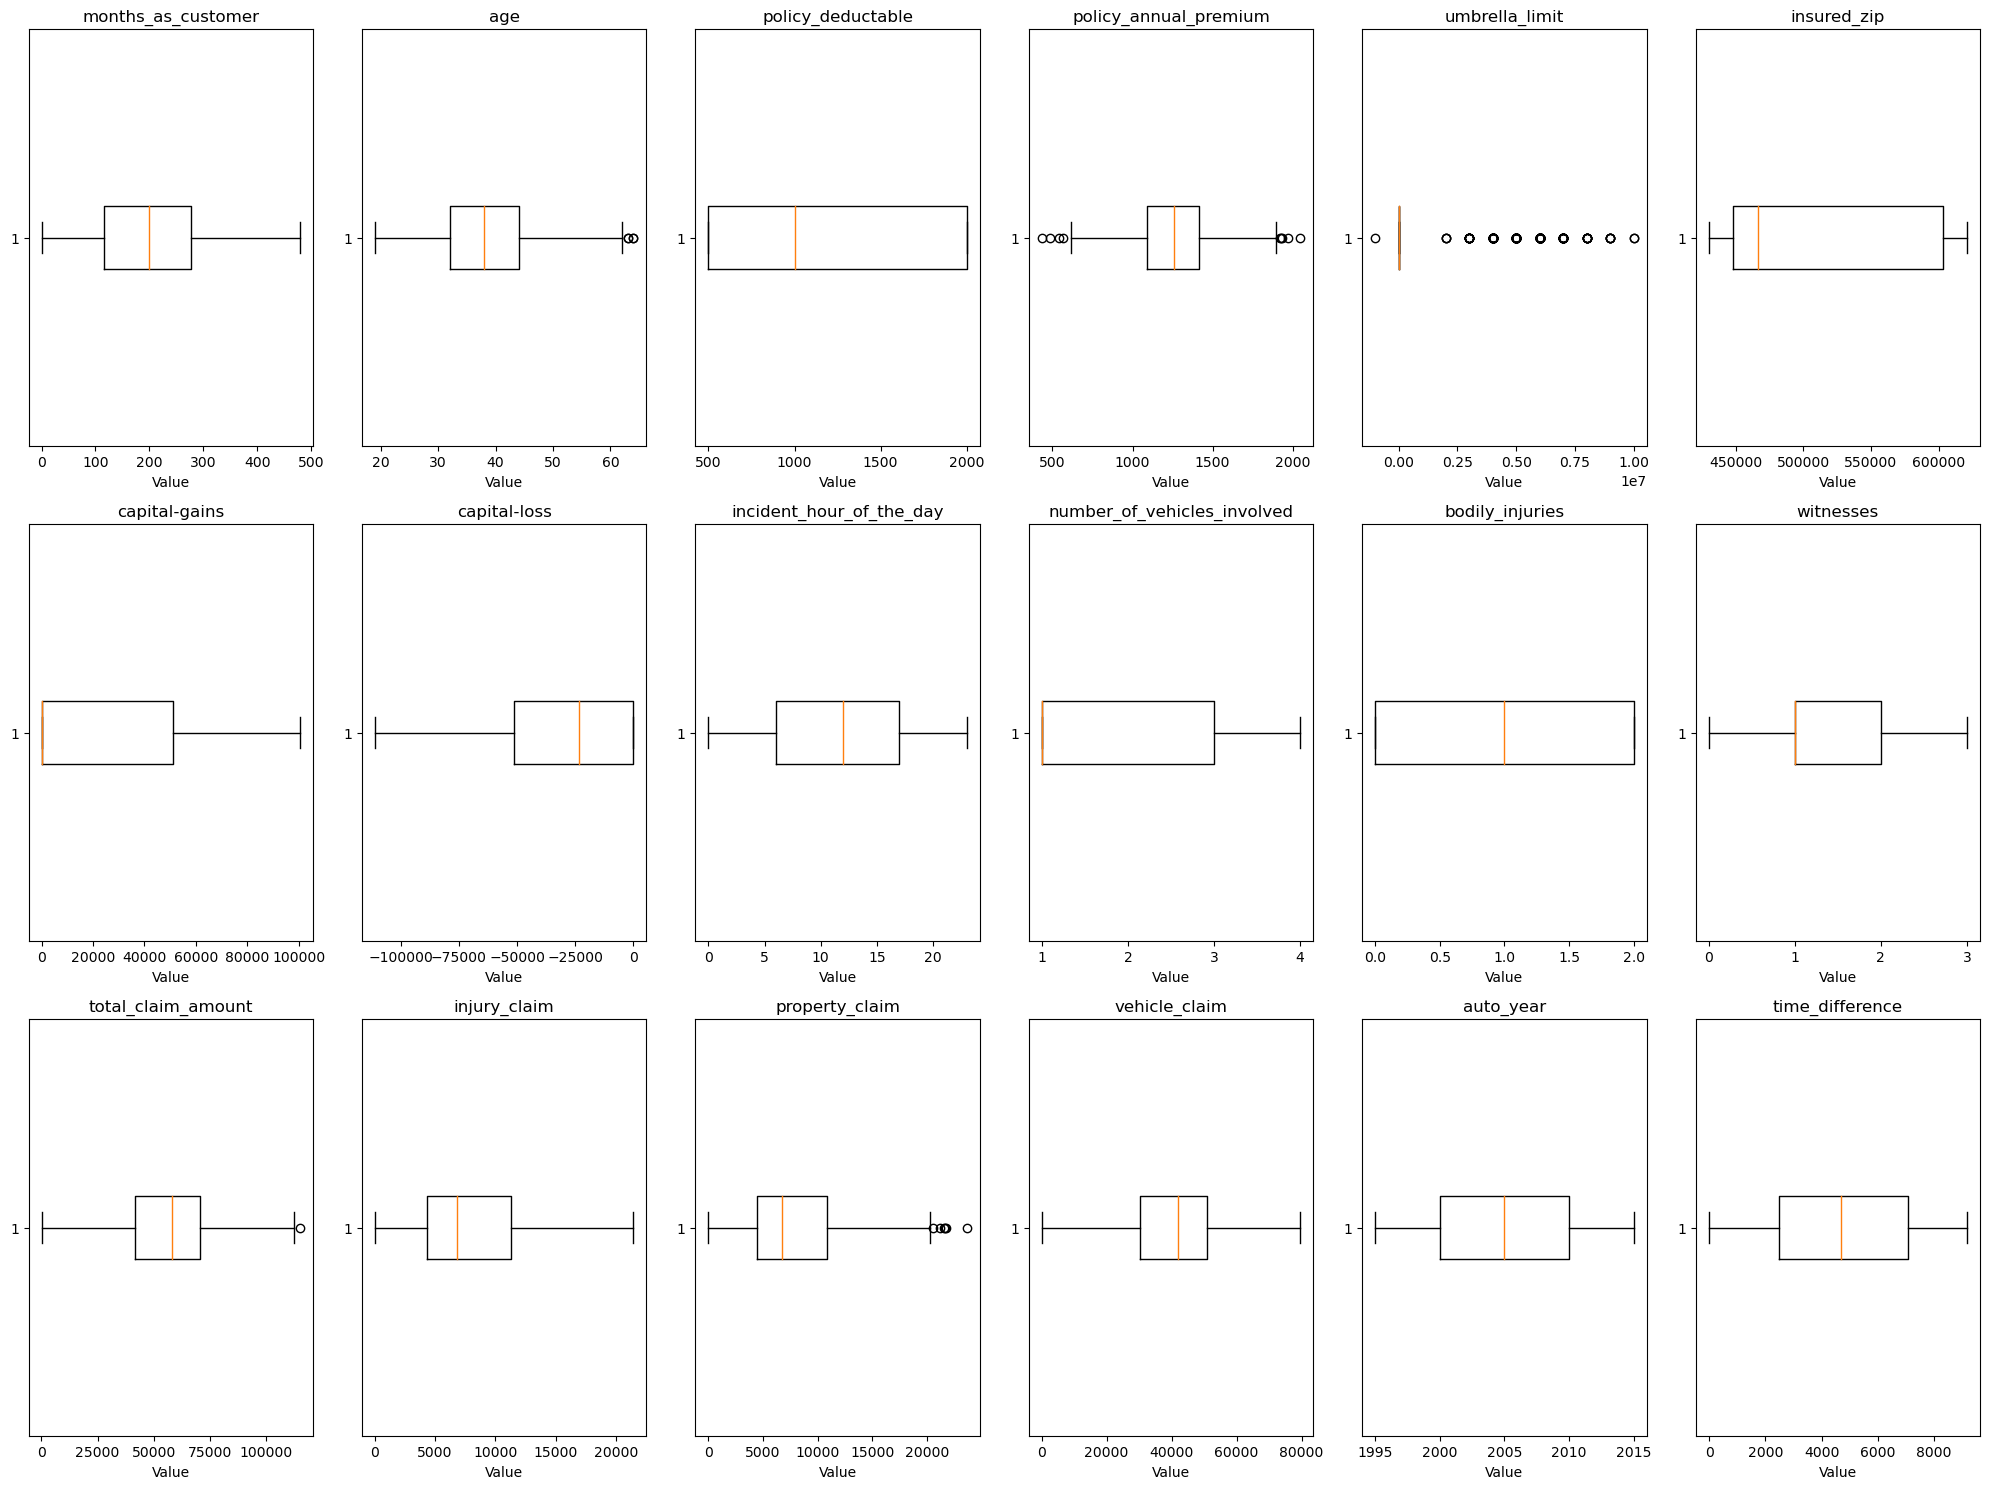

In [20]:
# Creating subplots for box plots
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 15))

# Iterating over numerical columns and create box plots
for i, col in enumerate(numerical_cols):
    ax = axes[i // 6, i % 6]
    ax.boxplot(df[col], vert=False)
    ax.set_title(col)
    ax.set_xlabel('Value')

# Adjusting the layout and spacing
fig.tight_layout()


plt.show()

In [21]:
# Removing outliers from the dataframe
df_outliers_removed = df[~outliers.any(axis=1)]

# Checking the new shape of the dataframe
print("Original shape:", df.shape)
print("Shape after removing outliers:", df_outliers_removed.shape)


Original shape: (1000, 40)
Shape after removing outliers: (782, 40)


scaling numerical features 

In [22]:
scaler = StandardScaler()
numerical_cols = ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip',
                  'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries',
                  'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year', 'time_difference']

df_outliers_removed[numerical_cols] = scaler.fit_transform(df_outliers_removed[numerical_cols])

C:\Users\Amal_VT\AppData\Local\Temp\ipykernel_2812\1825263514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_outliers_removed[numerical_cols] = scaler.fit_transform(df_outliers_removed[numerical_cols])


checking the distribution of fraud_reported

In [23]:
# distribution of legit claim & fraudulent claim
# Here 0 is a legit claim and 1 is a fraudulent claim
df_outliers_removed['fraud_reported'].value_counts()

0    600
1    182
Name: fraud_reported, dtype: int64

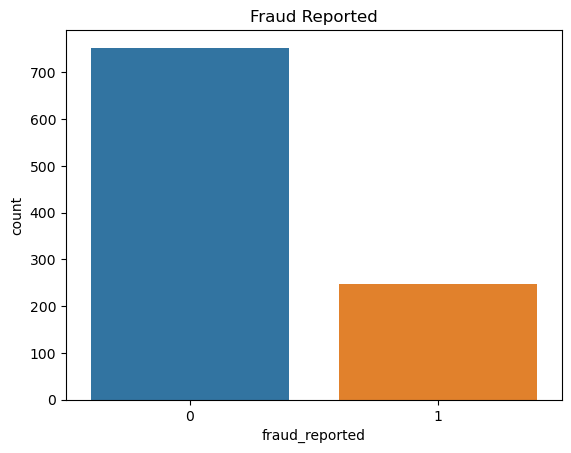

In [24]:
# Checking the distribution of the target variable
sns.countplot(x='fraud_reported', data=df)
plt.title('Fraud Reported')
plt.show()


In [25]:
# separating the data for analysis
legit = df_outliers_removed[df_outliers_removed.fraud_reported == 0]
fraud = df_outliers_removed[df_outliers_removed.fraud_reported == 1]

In [26]:
# Here we can see the dataset is imbalanced.

print(legit.shape)
print(fraud.shape)

(600, 40)
(182, 40)


In [27]:
#selecting the columns for prediction
data=df_outliers_removed[['months_as_customer',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_occupation',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available',
       'injury_claim', 'property_claim', 'vehicle_claim'
        , 'fraud_reported', 'time_difference']]

In [28]:
X = data.drop('fraud_reported', axis=1)
y = data['fraud_reported']


oversampling using random oversampler

In [29]:
# Applying Random Oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
print(y.value_counts())
print(y_resampled.value_counts())

0    600
1    182
Name: fraud_reported, dtype: int64
1    600
0    600
Name: fraud_reported, dtype: int64


In [75]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)


# prediction using different models 

Logistic regression

In [58]:
# Initializing the models
model1 = LogisticRegression()

# Fitting the models on the training data and make predictions
model1.fit(X_train, y_train)
y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

# Calculating and printing the accuracy scores for the train and test data
train_accuracy1 = accuracy_score(y_train, y_train_pred1)
test_accuracy1 = accuracy_score(y_test, y_test_pred1)
print("Logistic Regression - Train Accuracy:", train_accuracy1)
print("Logistic Regression - Test Accuracy:", test_accuracy1)





Logistic Regression - Train Accuracy: 0.78125
Logistic Regression - Test Accuracy: 0.725


C:\Users\Amal_VT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier

In [80]:

# Initialize the decision tree classifier with desired hyperparameters
model2 = DecisionTreeClassifier(max_depth=7, min_samples_split=8)

# Fit the model on the training data
model2.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = model2.predict(X_train)
y_test_pred = model2.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print("Decision Tree - Train Accuracy:", train_accuracy)
print("Decision Tree - Test Accuracy:", test_accuracy)


Decision Tree - Train Accuracy: 0.9072916666666667
Decision Tree - Test Accuracy: 0.8041666666666667


using gridsearchcv to tune the hyperparameters for best performance 


In [82]:
# Defining the hyperparameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

model2 = DecisionTreeClassifier()


# Creating a GridSearchCV object
grid_search = GridSearchCV(model2, param_grid, cv=5)

# Fitting the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Calculating and print the train accuracy
train_accuracy = best_model.score(X_train, y_train)

# Evaluating the best model on the test data
test_accuracy = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 1.0
Test Accuracy: 0.9291666666666667


RandomForestClassifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
model3 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=2)

# Fit the model on the training data
model3.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = model3.predict(X_train)
y_test_pred = model3.predict(X_test)

# Calculate the accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print("Random Forest - Train Accuracy:", train_accuracy)
print("Random Forest - Test Accuracy:", test_accuracy)


Random Forest - Train Accuracy: 0.9864583333333333
Random Forest - Test Accuracy: 0.8875


using RandomizedSearchCV for tuning hyperparametrs for best performance 

In [86]:


# Defining the parameter grid
param_grid = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_depth': randint(2, 10),         # Maximum depth of each tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),   # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}


# Performing randomized search using RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model3, param_distributions=param_grid, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train, y_train)

# Getting the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Making predictions on the train and test sets using the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculating and print the accuracy scores for the train and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Random Forest - Train Accuracy:", train_accuracy)
print("Random Forest - Test Accuracy:", test_accuracy)
print("Best Parameters:", best_params)


Random Forest - Train Accuracy: 0.9864583333333333
Random Forest - Test Accuracy: 0.9
Best Parameters: {'bootstrap': False, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 918}


Support Vector Classifier

In [87]:
# Initializing the models
model4 = SVC()

# Fitting the models on the training data and make predictions
model4.fit(X_train, y_train)
y_train_pred4 = model4.predict(X_train)
y_test_pred4 = model4.predict(X_test)

# Calculating and printing the accuracy scores for the train and test data
train_accuracy4 = accuracy_score(y_train, y_train_pred4)
test_accuracy4 = accuracy_score(y_test, y_test_pred4)
print("Support Vector Classifier - Train Accuracy:", train_accuracy4)
print("Support Vector Classifier - Test Accuracy:", test_accuracy4)


Support Vector Classifier - Train Accuracy: 0.5072916666666667
Support Vector Classifier - Test Accuracy: 0.4708333333333333


Voting classifier

In [88]:


# Initializing individual classifiers
classifier1 = LogisticRegression()
classifier2 = DecisionTreeClassifier()
classifier3 = SVC(probability=True)  # Note: probability=True for soft voting

# Creating the Voting Classifier
voting_classifier = VotingClassifier(estimators=[
    ('logistic_regression', classifier1),
    ('decision_tree', classifier2),
    ('svm', classifier3)
])

# Training the Voting Classifier
voting_classifier.fit(X_train, y_train)

# Making predictions on the train and test sets
y_train_pred = voting_classifier.predict(X_train)
y_test_pred = voting_classifier.predict(X_test)

# Calculating the accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing the accuracy scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


C:\Users\Amal_VT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train Accuracy: 0.8989583333333333
Test Accuracy: 0.7833333333333333


Adaboost clasiifier

In [89]:


# Initializing the base estimator (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1)

# Creating the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Training the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# Making predictions on the train and test sets
y_train_pred = adaboost_classifier.predict(X_train)
y_test_pred = adaboost_classifier.predict(X_test)

# Calculating the accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing the accuracy scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.8541666666666666
Test Accuracy: 0.7833333333333333


Catboost classifier

In [90]:


# Initializing the CatBoost classifier
catboost_classifier = CatBoostClassifier()

# Training the classifier
catboost_classifier.fit(X_train, y_train)

# Making predictions on the train and test sets
y_train_pred = catboost_classifier.predict(X_train)
y_test_pred = catboost_classifier.predict(X_test)

# Calculating the accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Printing the accuracy scores
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Learning rate set to 0.010124
0:	learn: 0.6872478	total: 4.96ms	remaining: 4.95s
1:	learn: 0.6810211	total: 9.4ms	remaining: 4.69s
2:	learn: 0.6742650	total: 13.4ms	remaining: 4.46s
3:	learn: 0.6687435	total: 17.4ms	remaining: 4.33s
4:	learn: 0.6639319	total: 21ms	remaining: 4.18s
5:	learn: 0.6589568	total: 24.3ms	remaining: 4.02s
6:	learn: 0.6542632	total: 28ms	remaining: 3.97s
7:	learn: 0.6488545	total: 31.7ms	remaining: 3.92s
8:	learn: 0.6428675	total: 35.4ms	remaining: 3.89s
9:	learn: 0.6380598	total: 38.9ms	remaining: 3.85s
10:	learn: 0.6325232	total: 42.8ms	remaining: 3.85s
11:	learn: 0.6277465	total: 46.2ms	remaining: 3.81s
12:	learn: 0.6244022	total: 48.2ms	remaining: 3.66s
13:	learn: 0.6196643	total: 52.3ms	remaining: 3.68s
14:	learn: 0.6157862	total: 55.9ms	remaining: 3.67s
15:	learn: 0.6119661	total: 59.3ms	remaining: 3.65s
16:	learn: 0.6071084	total: 63.6ms	remaining: 3.68s
17:	learn: 0.6027809	total: 67.4ms	remaining: 3.68s
18:	learn: 0.5985203	total: 72.1ms	remaining: 3.7

194:	learn: 0.3065791	total: 759ms	remaining: 3.13s
195:	learn: 0.3061619	total: 763ms	remaining: 3.13s
196:	learn: 0.3056919	total: 767ms	remaining: 3.13s
197:	learn: 0.3052176	total: 771ms	remaining: 3.12s
198:	learn: 0.3045258	total: 775ms	remaining: 3.12s
199:	learn: 0.3037933	total: 779ms	remaining: 3.11s
200:	learn: 0.3028682	total: 783ms	remaining: 3.11s
201:	learn: 0.3022963	total: 787ms	remaining: 3.11s
202:	learn: 0.3013543	total: 791ms	remaining: 3.1s
203:	learn: 0.3006782	total: 795ms	remaining: 3.1s
204:	learn: 0.2998934	total: 798ms	remaining: 3.1s
205:	learn: 0.2991953	total: 802ms	remaining: 3.09s
206:	learn: 0.2985810	total: 805ms	remaining: 3.08s
207:	learn: 0.2978053	total: 809ms	remaining: 3.08s
208:	learn: 0.2968619	total: 812ms	remaining: 3.07s
209:	learn: 0.2960040	total: 816ms	remaining: 3.07s
210:	learn: 0.2950208	total: 819ms	remaining: 3.06s
211:	learn: 0.2942142	total: 823ms	remaining: 3.06s
212:	learn: 0.2936350	total: 826ms	remaining: 3.05s
213:	learn: 0.2

401:	learn: 0.1963210	total: 1.56s	remaining: 2.32s
402:	learn: 0.1960806	total: 1.56s	remaining: 2.32s
403:	learn: 0.1956320	total: 1.57s	remaining: 2.31s
404:	learn: 0.1951238	total: 1.57s	remaining: 2.31s
405:	learn: 0.1948283	total: 1.58s	remaining: 2.31s
406:	learn: 0.1944231	total: 1.58s	remaining: 2.31s
407:	learn: 0.1940782	total: 1.59s	remaining: 2.3s
408:	learn: 0.1937658	total: 1.59s	remaining: 2.3s
409:	learn: 0.1934955	total: 1.59s	remaining: 2.3s
410:	learn: 0.1930321	total: 1.6s	remaining: 2.29s
411:	learn: 0.1926399	total: 1.6s	remaining: 2.29s
412:	learn: 0.1923476	total: 1.61s	remaining: 2.28s
413:	learn: 0.1919340	total: 1.61s	remaining: 2.28s
414:	learn: 0.1912330	total: 1.61s	remaining: 2.27s
415:	learn: 0.1905281	total: 1.62s	remaining: 2.27s
416:	learn: 0.1903463	total: 1.62s	remaining: 2.27s
417:	learn: 0.1900552	total: 1.63s	remaining: 2.26s
418:	learn: 0.1898363	total: 1.63s	remaining: 2.26s
419:	learn: 0.1895485	total: 1.63s	remaining: 2.25s
420:	learn: 0.189

604:	learn: 0.1325827	total: 2.35s	remaining: 1.53s
605:	learn: 0.1323339	total: 2.35s	remaining: 1.53s
606:	learn: 0.1321474	total: 2.36s	remaining: 1.53s
607:	learn: 0.1317215	total: 2.36s	remaining: 1.52s
608:	learn: 0.1315229	total: 2.37s	remaining: 1.52s
609:	learn: 0.1314300	total: 2.37s	remaining: 1.51s
610:	learn: 0.1312399	total: 2.37s	remaining: 1.51s
611:	learn: 0.1310267	total: 2.38s	remaining: 1.51s
612:	learn: 0.1307690	total: 2.38s	remaining: 1.5s
613:	learn: 0.1305080	total: 2.38s	remaining: 1.5s
614:	learn: 0.1301717	total: 2.39s	remaining: 1.5s
615:	learn: 0.1299910	total: 2.39s	remaining: 1.49s
616:	learn: 0.1297043	total: 2.4s	remaining: 1.49s
617:	learn: 0.1294578	total: 2.4s	remaining: 1.48s
618:	learn: 0.1292072	total: 2.4s	remaining: 1.48s
619:	learn: 0.1288814	total: 2.41s	remaining: 1.48s
620:	learn: 0.1286527	total: 2.41s	remaining: 1.47s
621:	learn: 0.1283684	total: 2.42s	remaining: 1.47s
622:	learn: 0.1280412	total: 2.42s	remaining: 1.46s
623:	learn: 0.1278

811:	learn: 0.0902850	total: 3.14s	remaining: 727ms
812:	learn: 0.0900389	total: 3.15s	remaining: 723ms
813:	learn: 0.0898134	total: 3.15s	remaining: 720ms
814:	learn: 0.0897092	total: 3.15s	remaining: 716ms
815:	learn: 0.0895943	total: 3.16s	remaining: 712ms
816:	learn: 0.0893749	total: 3.16s	remaining: 708ms
817:	learn: 0.0892130	total: 3.17s	remaining: 705ms
818:	learn: 0.0890780	total: 3.17s	remaining: 701ms
819:	learn: 0.0888359	total: 3.17s	remaining: 697ms
820:	learn: 0.0887122	total: 3.18s	remaining: 693ms
821:	learn: 0.0886352	total: 3.18s	remaining: 689ms
822:	learn: 0.0885841	total: 3.18s	remaining: 685ms
823:	learn: 0.0884409	total: 3.19s	remaining: 681ms
824:	learn: 0.0882629	total: 3.19s	remaining: 677ms
825:	learn: 0.0881013	total: 3.19s	remaining: 673ms
826:	learn: 0.0879347	total: 3.2s	remaining: 669ms
827:	learn: 0.0878410	total: 3.2s	remaining: 665ms
828:	learn: 0.0876648	total: 3.21s	remaining: 661ms
829:	learn: 0.0874297	total: 3.21s	remaining: 658ms
830:	learn: 0.